#### Импортируем необходимые библиотеки и датасет

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [46]:
from sklearn.datasets import load_boston
import pandas as pd
data = pd.read_csv(load_boston()['filename'], skiprows=1)

Ознакомимся с представленным датасетом

In [3]:
print(load_boston()['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [47]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [6]:
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


Видим, что параметры CRIM и ZN имеют аномально высокие максимальные значения, возможно выбросы.

Посмотрим какую информацию можно получить из матрицы корреляции

<AxesSubplot:>

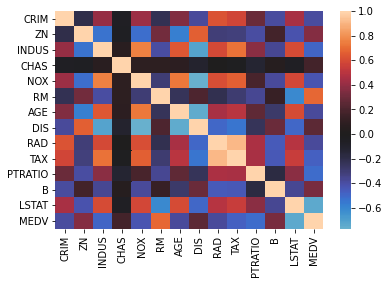

In [7]:
sns.heatmap(data.corr(), center = 0)

Корреляция между TAX и RAD довольно высокая  
CHAS же, наоборот плохо коррелирует со всеми остальными признаками, и практически не влияет на стоимость.

In [8]:
data.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

Расчет качества данных с помощью линейной регрессии

In [9]:
def get_score(X,y, random_seed=42, model=None):
    if model is None:
        model = LinearRegression()
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=random_seed )  
        model.fit(X_train, y_train)
    return model.score(X_test, y_test)

Для начала узнаем, какую точность дадут все перечисленные параметры  
И параметры имеющие наибольший вес (получены методом перебора)  
А так же посмотрим, что нам дает CHAS

In [10]:
cols = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT']
cols2 = ['RM', 'LSTAT', 'TAX', 'PTRATIO']
cols3 = ['CHAS']

In [11]:
get_score(data.dropna()[cols], data.dropna()['MEDV'])

0.7112260057484903

In [12]:
get_score(data.dropna()[cols2], data.dropna()['MEDV'])

0.6530863944171981

In [13]:
get_score(data.dropna()[cols3], data.dropna()['MEDV'])

-0.06757977975388352

Попробуем убрать СHAS

In [35]:
cols4 = ['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT']
get_score(data.dropna()[cols4], data.dropna()['MEDV'])

0.7088141357902255

Точность упала, смысла избавлять от данного параметра нет.

Cделаем масштабирование данных:

In [54]:
datamatata = data.copy()

In [57]:
scaler = StandardScaler()
scaled_values = scaler.fit_transform(datamatata) 
datamatata.loc[:,:] = scaled_values
datamatata.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,-0.419782,0.284830,-1.287909,-0.272599,-0.144217,0.413672,-0.120013,0.140214,-0.982843,-0.666608,-1.459000,0.441052,-1.075562,0.159686
1,-0.417339,-0.487722,-0.593381,-0.272599,-0.740262,0.194274,0.367166,0.557160,-0.867883,-0.987329,-0.303094,0.441052,-0.492439,-0.101524
2,-0.417342,-0.487722,-0.593381,-0.272599,-0.740262,1.282714,-0.265812,0.557160,-0.867883,-0.987329,-0.303094,0.396427,-1.208727,1.324247
3,-0.416750,-0.487722,-1.306878,-0.272599,-0.835284,1.016303,-0.809889,1.077737,-0.752922,-1.106115,0.113032,0.416163,-1.361517,1.182758
4,-0.412482,-0.487722,-1.306878,-0.272599,-0.835284,1.228577,-0.511180,1.077737,-0.752922,-1.106115,0.113032,0.441052,-1.026501,1.487503


In [58]:
get_score(datamatata.dropna()[cols], datamatata.dropna()['MEDV'])

0.7112260057484925

Как видно, масштабирование данных никак не изменило ситуацию, попробуем поработать с выбросами в параметрах CRIM и ZN.

In [181]:
upper_boundCRIM = data['CRIM'].quantile(q=0.75)
upper_boundZN = data['ZN'].quantile(q=0.75)
data_short = data.loc[(data['CRIM'] < upper_boundCRIM) & (data['ZN'] < upper_boundZN)]

In [182]:
data_short.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,245.000000,245.0,245.000000,245.000000,245.000000,245.000000,245.000000,245.000000,245.000000,245.000000,245.000000,245.000000,245.000000,245.000000
mean,0.578899,0.0,11.173592,0.085714,0.546886,6.226759,70.597959,3.449486,4.910204,337.865306,18.488163,375.674939,12.085061,22.709388
std,0.805005,0.0,6.654450,0.280515,0.099840,0.651879,25.366658,1.348127,3.376646,104.059302,1.983948,47.746455,6.087383,7.678784
min,0.024980,0.0,1.890000,0.000000,0.413000,4.903000,2.900000,1.321600,1.000000,188.000000,14.700000,70.800000,1.730000,7.000000
25%,0.092990,0.0,6.200000,0.000000,0.489000,5.869000,53.700000,2.388700,4.000000,277.000000,17.400000,378.250000,7.670000,18.500000
50%,0.222120,0.0,9.690000,0.000000,0.520000,6.096000,76.900000,3.317500,4.000000,307.000000,18.600000,392.300000,11.100000,21.200000
75%,0.629760,0.0,18.100000,0.000000,0.581000,6.426000,92.700000,4.354900,5.000000,403.000000,20.200000,396.140000,15.100000,24.200000
max,3.673670,0.0,27.740000,1.000000,0.871000,8.780000,100.000000,8.013600,24.000000,711.000000,21.200000,396.900000,34.410000,50.000000


In [183]:
get_score(data_short.dropna()[cols], data_short.dropna()['MEDV'])

0.8277340122237664

Как видим, результат значительно улучшился, однако была удалена большая часть данных.

In [212]:
upper_boundCRIM = data['CRIM'].quantile(q=0.9)
upper_boundZN = data['ZN'].quantile(q=0.9)
data_short2 = data.loc[(data['CRIM'] < upper_boundCRIM) & (data['ZN'] < upper_boundZN)]

In [213]:
data_short2.shape

(404, 14)

In [214]:
get_score(data_short2.dropna()[cols], data_short2.dropna()['MEDV'])

0.6922575840021321

Теперь же, наоборот, результат стал хуже.